## Cargamos las Librerías:

In [1]:
import requests
import pandas as pd
import os
from dotenv import load_dotenv
import locale
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
sns.set_style("white")
sns.set_context("notebook")
plt.rcParams.update({
    'font.family': 'serif',
    'mathtext.fontset': 'stix',
    'font.serif': 'Times New Roman',
    'figure.figsize': (11, 9.4),
    'axes.edgecolor': 'white',
    'axes.labelcolor': '#333333',
    'axes.titlesize': 20,
    'axes.titlecolor': '#333333',
    'xtick.color': '#333333',
    'ytick.color': '#333333',
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12
})

## Guardamos el Token:

In [2]:
load_dotenv(dotenv_path='/home/barea/INEGI_API/.env')

token = os.getenv("INEGI_TOKEN")

## ID del Indicador:

In [3]:
serie_id = "1303,1304"

## EndPoint de Consulta:

In [4]:
url = f"https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/{serie_id}/es/0700/false/BIE/2.0/{token}?type=json"

In [5]:
print(url)

https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/1303,1304/es/0700/false/BIE/2.0/0f3e8a33-8776-d1b7-2615-657d9245b616?type=json


## Hacemos la Solicitud:

In [6]:
response = requests.get(url)
data = response.json()

In [7]:
data

{'Header': {'Name': 'Datos compactos BIE',
  'Email': 'atencion.usuarios@inegi.org.mx'},
 'Series': [{'INDICADOR': '1303',
   'FREQ': '8',
   'TOPIC': '10300110009000100010',
   'UNIT': '4',
   'UNIT_MULT': None,
   'NOTE': '3059',
   'SOURCE': '13',
   'LASTUPDATE': '23/07/2025 03:52:11 p. m.',
   'STATUS': None,
   'OBSERVATIONS': [{'TIME_PERIOD': '2025/05',
     'OBS_VALUE': '6142',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '13',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2025/04',
     'OBS_VALUE': '6078',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '13',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2025/03',
     'OBS_VALUE': '6224',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '13',
     'OBS_NOTE': None,
     'COBER_GEO': '00'},
    {'TIME_PERIOD': '2025/02',
     'OBS_VALUE': '6039',
     'OBS_EXCEPTION': '',
     'OBS_STATUS': '',
     'OBS_SOURCE': '13',


## Extraemos los Datos:

In [8]:
serie_oro = data['Series'][0]['OBSERVATIONS']
serie_plata = data['Series'][1]['OBSERVATIONS']

In [9]:
años = [obs['TIME_PERIOD'] for obs in serie_oro]
val_oro = [float(obs['OBS_VALUE']) for obs in serie_oro]
val_plata = [float(obs['OBS_VALUE']) for obs in serie_plata]

In [ ]:
unidad_dict = {
    '1': 'Índice base 1978 = 100',
    '2': 'Índice base 1980 = 100',
    '4': 'Kilogramos',
    '5': 'Kilómetros',
    '7': 'Miles de barriles por día',
    '10': 'Miles de kilómetros',
    '11': 'Miles de KWH',
    '13': 'Millones de nuevos pesos a precios de 1980',
    '14': 'Millones de pesos a precios corrientes',
    '17': 'Miles de pasajeros',
    '18': 'Miles de personas'
}

unidad_oro = unidad_dict.get(data['Series'][0]['UNIT'], 'Desconocida')
unidad_plata = unidad_dict.get(data['Series'][1]['UNIT'], 'Desconocida')

print(f"Oro (Unidad): {unidad_oro}")
print(f"Plata (Unidad): {unidad_plata}")

## Creamos el DataFrame:

In [10]:
data_oro_plata = pd.DataFrame({
    'Año': años,
    'Oro': val_oro,
    'Plata': val_plata
})

In [11]:
data_oro_plata.head(15)

,Año,Oro,Plata
0,2025/05,6142.0,341994.0
1,2025/04,6078.0,350039.0
2,2025/03,6224.0,351667.0
3,2025/02,6039.0,345927.0
4,2025/01,6132.0,341572.0
5,2024/12,6346.0,345100.0
6,2024/11,5887.0,338127.0
7,2024/10,5977.0,323972.0
8,2024/09,5252.0,320980.0
9,2024/08,5314.0,329220.0


In [12]:
data_oro_plata['Oro'].sum()

np.float64(1923377.0)

In [13]:
data_oro_plata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Año     545 non-null    object 
 1   Oro     545 non-null    float64
 2   Plata   545 non-null    float64
dtypes: float64(2), object(1)
memory usage: 12.9+ KB


## Transformamos Variables y Añadimos Otras:

In [14]:
data_oro_plata['Año'] = pd.to_datetime(data_oro_plata['Año'], format='%Y/%m')

In [15]:
data_oro_plata['Año_Num'] = data_oro_plata['Año'].dt.year
data_oro_plata['Mes'] = data_oro_plata['Año'].dt.month

In [16]:
data_oro_plata['Nombre_Mes'] = data_oro_plata['Año'].dt.month_name()

In [18]:
data_oro_plata.head(20)

,Año,Oro,Plata,Año_Num,Mes,Nombre_Mes
0,2025-05-01,6142.0,341994.0,2025,5,May
1,2025-04-01,6078.0,350039.0,2025,4,April
2,2025-03-01,6224.0,351667.0,2025,3,March
3,2025-02-01,6039.0,345927.0,2025,2,February
4,2025-01-01,6132.0,341572.0,2025,1,January
5,2024-12-01,6346.0,345100.0,2024,12,December
6,2024-11-01,5887.0,338127.0,2024,11,November
7,2024-10-01,5977.0,323972.0,2024,10,October
8,2024-09-01,5252.0,320980.0,2024,9,September
9,2024-08-01,5314.0,329220.0,2024,8,August


In [19]:
data_oro_plata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Año         545 non-null    datetime64[ns]
 1   Oro         545 non-null    float64       
 2   Plata       545 non-null    float64       
 3   Año_Num     545 non-null    int32         
 4   Mes         545 non-null    int32         
 5   Nombre_Mes  545 non-null    object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(1)
memory usage: 21.4+ KB


## Ordenamos el DataFrame:

In [20]:
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

In [21]:
data_oro_plata['Nombre_Mes'] = pd.Categorical(data_oro_plata['Nombre_Mes'],
                                             categories=orden_meses,
                                             ordered=True)

In [22]:
data_oro_plata

,Año,Oro,Plata,Año_Num,Mes,Nombre_Mes
0,2025-05-01,6142.0,341994.0,2025,5,May
1,2025-04-01,6078.0,350039.0,2025,4,April
2,2025-03-01,6224.0,351667.0,2025,3,March
3,2025-02-01,6039.0,345927.0,2025,2,February
4,2025-01-01,6132.0,341572.0,2025,1,January
...,...,...,...,...,...,...
540,1980-05-01,546.0,112018.0,1980,5,May
541,1980-04-01,570.0,120735.0,1980,4,April
542,1980-03-01,540.0,135648.0,1980,3,March
543,1980-02-01,426.0,123887.0,1980,2,February


In [23]:
data_oro_plata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Año         545 non-null    datetime64[ns]
 1   Oro         545 non-null    float64       
 2   Plata       545 non-null    float64       
 3   Año_Num     545 non-null    int32         
 4   Mes         545 non-null    int32         
 5   Nombre_Mes  545 non-null    category      
dtypes: category(1), datetime64[ns](1), float64(2), int32(2)
memory usage: 18.1 KB


## Guardamos el DataFrame:

In [ ]:
data_oro_plata.to_csv('data_oro_plata.csv', index=False)

In [ ]:
data_oro_plata[data_oro_plata['Año_Num'] == 2024]['Oro'].sum()

In [ ]:
data_oro_plata[data_oro_plata['Año_Num'] == 2023]['Oro'].sum()

In [ ]:
data_oro_plata[data_oro_plata['Año_Num'] == 2022]['Oro'].sum()

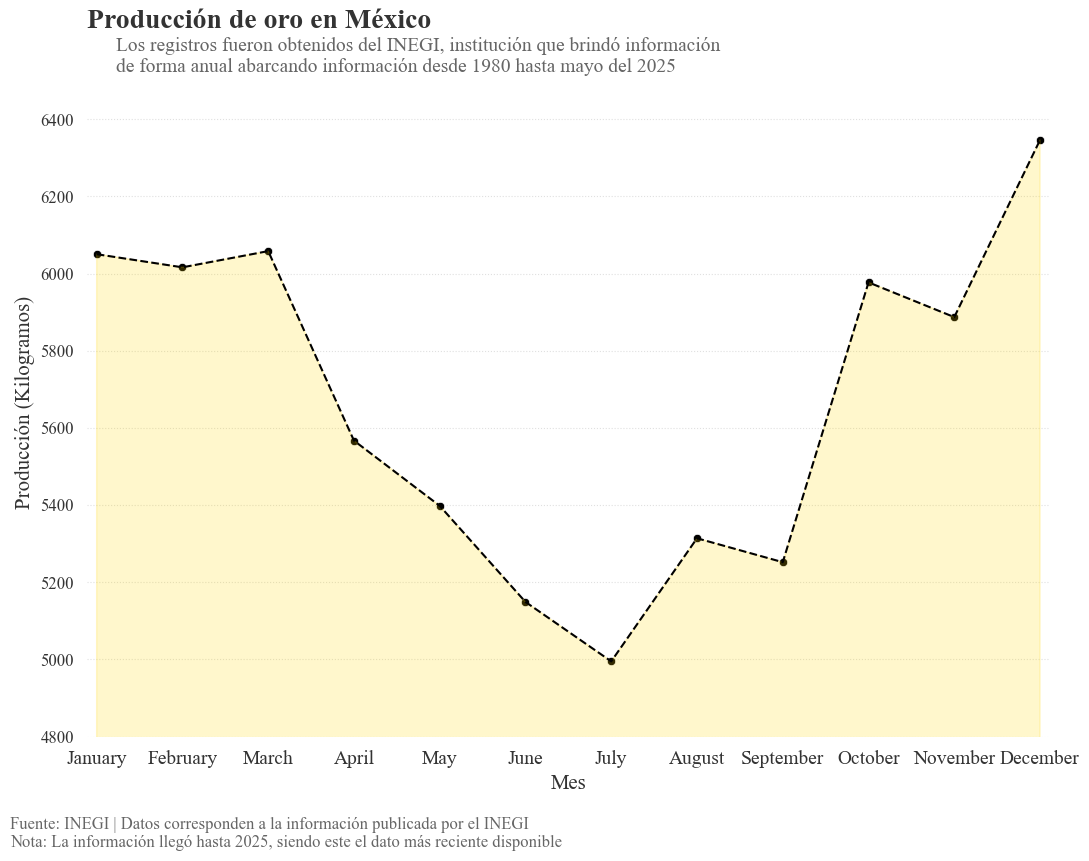

In [58]:
fig, ax = plt.subplots()

(
    data_oro_plata[data_oro_plata['Año_Num'] == 2024]
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
            linestyle = 'dashed'
        )
    )
)


(
    data_oro_plata[data_oro_plata['Año_Num'] == 2024]
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black'
        )
    )
)

(
    data_oro_plata[data_oro_plata['Año_Num'] == 2024]
    .pipe(
        lambda df: plt.fill_between(
            x=df['Nombre_Mes'],
            y1=df['Oro'],
            color='gold',
            alpha=0.2
        )
    )
)


ax.xaxis.set_tick_params(rotation=0, labelsize=14)
plt.setp(ax.get_xticklabels(), horizontalalignment='center')

ax.set_title('Producción de oro en México',
            loc='left', pad=28, fontweight='semibold')

ax.text(0.03, 0.992, 'Los registros fueron obtenidos del INEGI, institución que brindó información\n' 
         'de forma anual abarcando información desde 1980 hasta mayo del 2025',
        transform=ax.transAxes, fontsize=14, color='#666666')

ax.grid(True, axis='y', color='#e0e0e0', linestyle=':', linewidth=0.8)
ax.margins(x=0.01, y=0.03)


plt.figtext(0.01, 0.04, 
           'Fuente: INEGI | Datos corresponden a la información publicada por el INEGI\n'
           'Nota: La información llegó hasta 2025, siendo este el dato más reciente disponible',
           ha='left', color='#666666', fontsize=12)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.xlabel('Mes', size=15)
plt.ylabel('Producción (Kilogramos)', size=15)
sns.despine(left=True, bottom=True)
plt.ylim(bottom=4800)
plt.xticks(rotation=0)
plt.show()

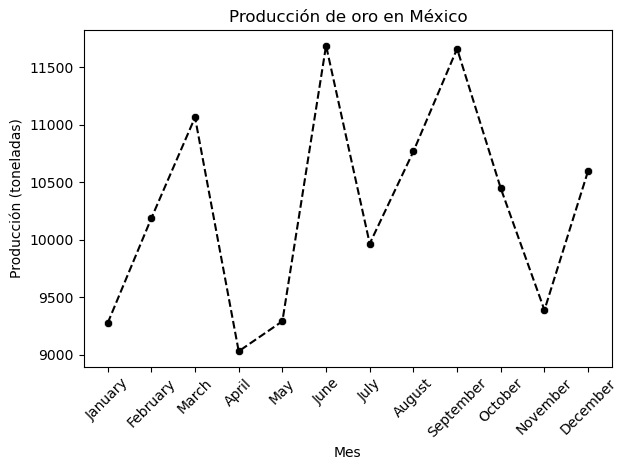

In [25]:
(
    data_oro_plata[data_oro_plata['Año_Num'] == 2015]
    .pipe(
        lambda df: sns.lineplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
            linestyle = 'dashed'
        )
    )
)

(
    data_oro_plata[data_oro_plata['Año_Num'] == 2015]
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Mes')
plt.ylabel('Producción (toneladas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

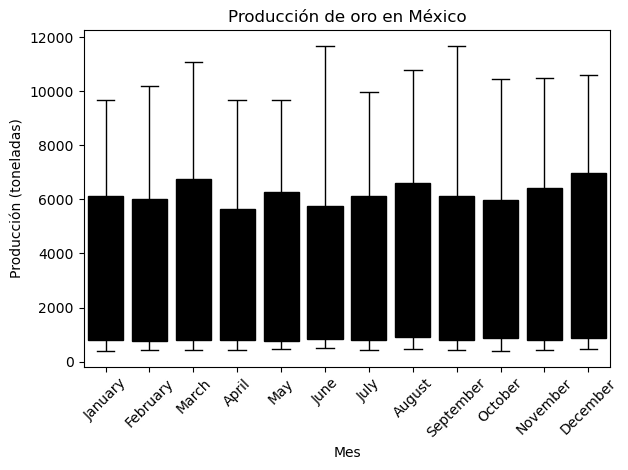

In [26]:
(
    data_oro_plata
    .pipe(
        lambda df: sns.boxplot(
            data = df,
            x = 'Nombre_Mes',
            y = 'Oro',
            color = 'black',
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Mes')
plt.ylabel('Producción (toneladas)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
data_oro_plata

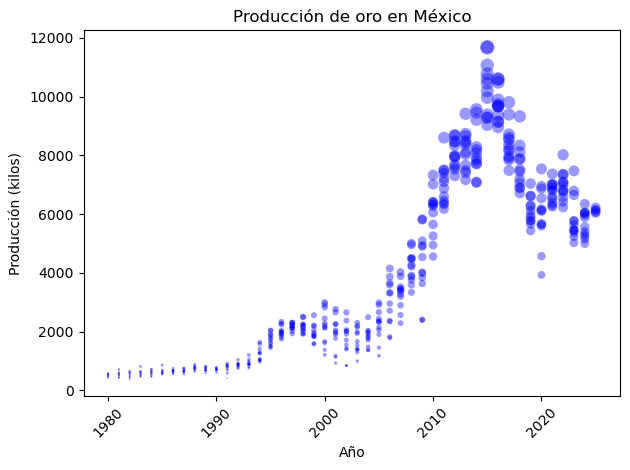

In [27]:
(
    data_oro_plata
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Año_Num',
            y = 'Oro',
            color = 'blue',
            sizes= (1, 100),
            size = 'Oro',
            alpha = 0.4,
            legend= False
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Año')
plt.ylabel('Producción (kilos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

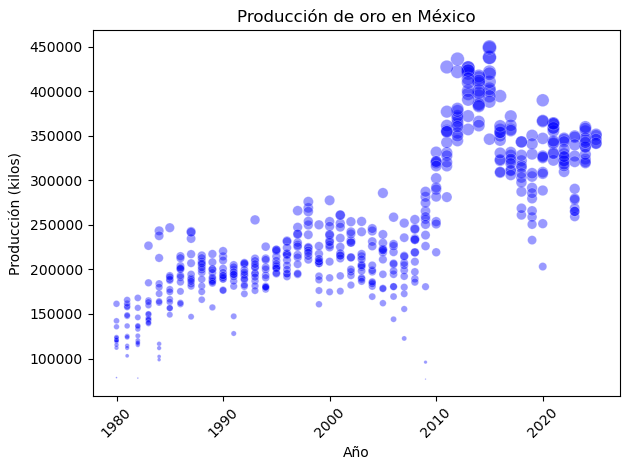

In [28]:
(
    data_oro_plata
    .pipe(
        lambda df: sns.scatterplot(
            data = df,
            x = 'Año_Num',
            y = 'Plata',
            color = 'blue',
            sizes= (1, 100),
            size = 'Plata',
            alpha = 0.4,
            legend= False
        )
    )
)

plt.title('Producción de oro en México')
plt.xlabel('Año')
plt.ylabel('Producción (kilos)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
(
    data_oro_plata.groupby('Año_Num')['Oro']
    .sum()
    .reset_index(name='Suma_Oro')
).sort_values(by = 'Suma_Oro', ascending= False)

,Año_Num,Suma_Oro
35,2015,123364.0
36,2016,116924.0
37,2017,100989.0
34,2014,98166.0
33,2013,97967.0
32,2012,96650.0
38,2018,91237.0
31,2011,84118.0
42,2022,83482.0
41,2021,80989.0
